<a href="https://colab.research.google.com/github/Mmbsaksd/Insurance-Claim/blob/main/Insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.4 MB/s 


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble
import warnings
warnings.filterwarnings('ignore')

#**Data Preprocessing**

In [3]:
#Loading Datasets
df = pd.read_csv('/content/train (1).csv')
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
df.shape

(59381, 128)

In [5]:
df = df.drop('Id', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


In [7]:
df.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=127)

In [8]:
#Checking the columns which have above 40% null value with Decending order
missing_value = df.isnull().mean()
missing_value[missing_value>0.4].sort_values(ascending=False)

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64

In [9]:
#Droping the columns which have null value above 40%
df = df.dropna(thresh = 0.4*df.shape[0],axis=1)

In [10]:
df.isnull().mean()[df.isnull().mean()>0]

Employment_Info_1      0.000320
Employment_Info_4      0.114161
Employment_Info_6      0.182786
Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_4          0.323066
Medical_History_1      0.149694
dtype: float64

In [11]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [12]:
#Dropint three columns due to irrelevent
df.drop(['Insurance_History_5','Family_Hist_2','Family_Hist_3'],axis=1, inplace=True)

In [13]:
df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False)

Family_Hist_4        0.323066
Employment_Info_6    0.182786
Medical_History_1    0.149694
Employment_Info_4    0.114161
Employment_Info_1    0.000320
dtype: float64

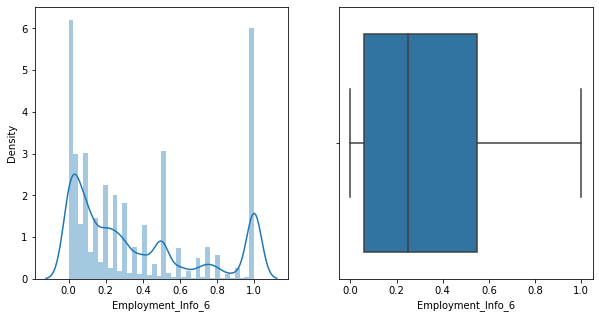

In [14]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.distplot(df['Employment_Info_6'], ax = axes[0])
sns.boxplot(df['Employment_Info_6'], ax = axes[1])

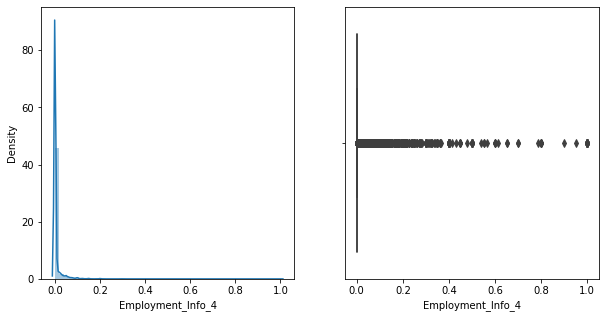

In [15]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_4'], ax= axes[0])
sns.boxplot(df['Employment_Info_4'], ax= axes[1])

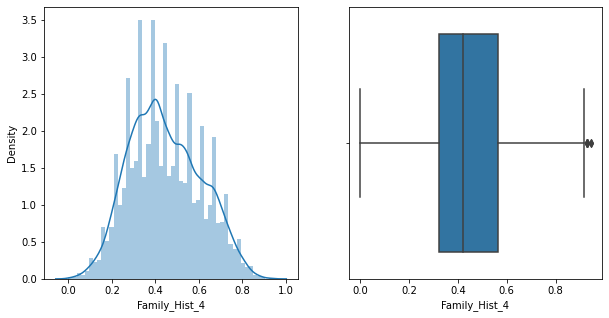

In [16]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Family_Hist_4'],ax=axes[0])
sns.boxplot(df['Family_Hist_4'],ax=axes[1])

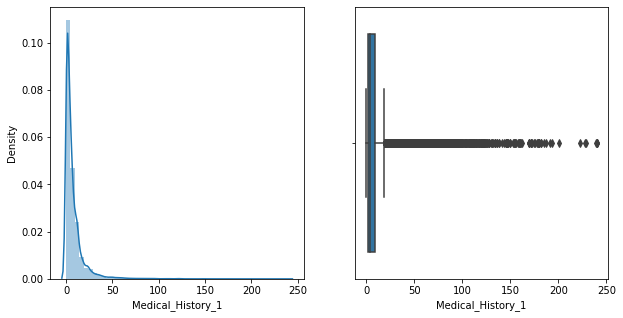

In [17]:
#Checking the distribution and finging outliers
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Medical_History_1'],ax=axes[0])
sns.boxplot(df['Medical_History_1'],ax=axes[1])

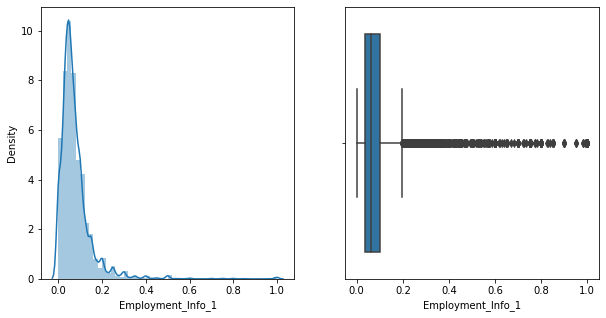

In [18]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_1'],ax=axes[0])
sns.boxplot(df['Employment_Info_1'],ax=axes[1])

In [19]:
df.isnull().sum()[df.isnull().mean()>0].sort_values(ascending=False)

Family_Hist_4        19184
Employment_Info_6    10854
Medical_History_1     8889
Employment_Info_4     6779
Employment_Info_1       19
dtype: int64

In [20]:
#Filling the na value with mean values
df['Family_Hist_1'] = df['Family_Hist_1'].fillna(df['Family_Hist_4'].mean())
df['Employment_Info_6'] = df['Employment_Info_6'].fillna(df['Employment_Info_6'].mean())
df['Medical_History_1'] = df['Medical_History_1'].fillna(df['Medical_History_1'].mean())
df['Employment_Info_4'] = df['Employment_Info_4'].fillna(df['Employment_Info_4'].mean())
df['Employment_Info_1'] = df['Employment_Info_1'].fillna(df['Employment_Info_1'].mean())
df['Family_Hist_4'] = df['Family_Hist_4'].fillna(df['Family_Hist_4'].mean())


In [21]:
#Converting categorical values into numeric
dummies = pd.get_dummies(df['Product_Info_2'])

#Concatinating derived dummies into df
df = pd.concat([df, dummies], axis=1)

#Droping the columns, inwhich its dummies variable are derived
df.drop('Product_Info_2',axis=1, inplace=True)
df

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,1,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,1,0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,1,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,1,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,1
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,0,0,0,0,0,1,0,0,0


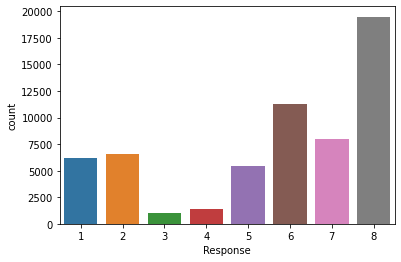

In [22]:
#Graphical representation of the distribution of response
sns.countplot(x = df.Response)

###**Data Preprocessing Summery**


*   One of the columns in dataframe is object type
*   There is no null value in dataset



In [23]:
#Defining the function for converting Target Columns into binary variable
def binary_classification(row):
  if ((row['Response']<= 7) & (row['Response']>0)):
    val = 0
  
  elif (row['Response']==8):
    val = 1

  else:
    val = -1

  return val

In [24]:
#Implimenting the defined function into Target columns
df['Modified_Response'] = df.apply(binary_classification, axis=1)


#Counting the modified response
df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

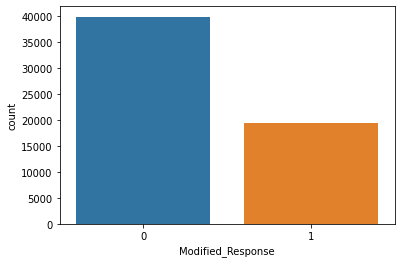

In [25]:
#Graphical Representation of modified response
sns.countplot(x= df['Modified_Response'])

In [26]:
#Droping columns of response
df.drop('Response',axis=1, inplace=True)

df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,C1,C2,C3,C4,D1,D2,D3,D4,E1,Modified_Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,1,0,0,1
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,1,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,1,0,1
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,1,0,0,0,1


In [27]:
#Descriptin on datasets
df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,C1,C2,C3,C4,D1,D2,D3,D4,E1,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.004800,0.002694,0.005153,0.003688,0.110372,0.105859,0.241171,0.182078,0.044577,0.328203
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.069113,0.051839,0.071601,0.060618,0.313356,0.307659,0.427798,0.385912,0.206374,0.469563
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Defining the dependent and independ variable
x = df.drop('Modified_Response', axis=1)
y = df['Modified_Response']

In [29]:
#Spliting the data into traning and testing dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
#Importing the required model for traning the datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
#Importing required libraries for evaluating model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [32]:
#Intializing model on object
lr = LogisticRegression()
rf = RandomForestClassifier()
xg = XGBClassifier()

In [33]:
param_dict_lr = {
    'C':[1e-3,1e-2,1e-1,1,10,100,1e+3]
}

param_dict_rf = {
    'max_depth':[4,6,8],
    'min_samples_leaf':[40, 60],
    'min_samples_split':[50,100,150],
    'n_estimators':[50, 80, 100]
}

param_dict_xgb = {
    'max_depth':[2,10,1],
    'n_estimators':range(60,220,40),
    'learning_rate' : [0.1, 0.05, 0.005,0.0005]
}

In [34]:
#Implimenting Gridsearch with defined parameter
lr_gridsearch = GridSearchCV(estimator = lr,
                             param_grid = param_dict_lr,
                             cv=5, verbose = 2, scoring = 'roc_auc')
lr_gridsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   1.9s
[CV] END ............................................C=0.001; total time=   2.0s
[CV] END ............................................C=0.001; total time=   3.4s
[CV] END ............................................C=0.001; total time=   4.0s
[CV] END ............................................C=0.001; total time=   3.6s
[CV] END .............................................C=0.01; total time=   3.7s
[CV] END .............................................C=0.01; total time=   4.6s
[CV] END .............................................C=0.01; total time=   4.2s
[CV] END .............................................C=0.01; total time=   3.9s
[CV] END .............................................C=0.01; total time=   4.0s
[CV] END ..............................................C=0.1; total time=   3.8s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0]},
             scoring='roc_auc', verbose=2)

In [35]:
#Evaluating the model with train logisticregression
print('Train ROC-AUC Score:', lr_gridsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC-AUC Scores:', lr_gridsearch.best_estimator_.score(xtest,ytest))

Train ROC-AUC Score: 0.751536712697878
Test ROC-AUC Scores: 0.7504420308158626


In [36]:
#Hypertunig the logistic model with RandomsearchCV
lr_randomsearch = RandomizedSearchCV(estimator=lr,
                                     param_distributions= param_dict_lr,
                                     cv=5, verbose=2, scoring='roc_auc')

#Initializing with traning dataset
lr_randomsearch.fit(xtrain,ytrain)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   1.7s
[CV] END ............................................C=0.001; total time=   1.7s
[CV] END ............................................C=0.001; total time=   1.7s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.7s
[CV] END .............................................C=0.01; total time=   1.7s
[CV] END .............................................C=0.01; total time=   1.8s
[CV] END .............................................C=0.01; total time=   1.8s
[CV] END .............................................C=0.01; total time=   1.8s
[CV] END .............................................C=0.01; total time=   1.8s
[CV] END ..............................................C=0.1; total time=   2.1s
[CV] END ........................................

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000.0]},
                   scoring='roc_auc', verbose=2)

In [37]:
print('Train ROC_AUC score:', lr_randomsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score:', lr_randomsearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score: 0.751536712697878
Test ROC_AUC score: 0.7504420308158626


In [38]:
#Implimenting the bayessearchcv with logistic regression
lr_bayessearch = BayesSearchCV(estimator=lr,
                               search_spaces={'C':Real(1e-6,1e+6)},
                               cv = 5, verbose =2, scoring='roc_auc',n_iter=32)

#Fitting defined model with traning dataset
lr_bayessearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=323884.696301831; total time=   2.0s
[CV] END .................................C=323884.696301831; total time=   1.8s
[CV] END .................................C=323884.696301831; total time=   1.9s
[CV] END .................................C=323884.696301831; total time=   1.8s
[CV] END .................................C=323884.696301831; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=103985.81167010954; total time=   2.0s
[CV] END ...............................C=103985.81167010954; total time=   1.7s
[CV] END ...............................C=103985.81167010954; total time=   2.0s
[CV] END ...............................C=103985.81167010954; total time=   1.8s
[CV] END ...............................C=103985.81167010954; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_iter=32,
              scoring='roc_auc',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize')},
              verbose=2)

In [39]:
#Printing the result of bayessearchcv
print("Train ROC_AUC score :", lr_bayessearch.best_estimator_.score(xtrain,ytrain))
print("Test ROC_AUC score :", lr_bayessearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score : 0.7502947120242506
Test ROC_AUC score : 0.7506104235076198


In [40]:
lr_gridsearch.best_estimator_

LogisticRegression(C=10)

In [41]:
lr_randomsearch.best_estimator_

LogisticRegression(C=10)

In [42]:
lr_bayessearch.best_estimator_

LogisticRegression(C=41991.29329300744)

In [43]:
#Implimenting the gridsearchcv with randomforest
rf_gridsearch = GridSearchCV(estimator=rf,
                             param_grid=  param_dict_rf,
                             cv = 5, verbose=2, scoring='roc_auc')


#Fitting defined model into train dataset
rf_gridsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [44]:
#Printing the score on trained model on roc_auc
print('Train ROC_AUC score :', rf_gridsearch.best_estimator_.score(xtrain, ytrain))
print('Test ROC_AUC score :', rf_gridsearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score : 0.8080793196362411
Test ROC_AUC score : 0.8069377789003958


In [34]:
#Hyper tuning the model with randomsearch on random forest
rf_randomsearch = RandomizedSearchCV(estimator=rf,
                                     param_distributions= param_dict_rf,
                                     cv = 5, verbose=2, scoring='roc_auc')

#Initializing the defined random forest model
rf_randomsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   7.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   7.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   9.1s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=100, n_estimators=100; total time=   6.1s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=100, n_estimators=100; total time=   3.1s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=100, n_estimators=100; total time=   3.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=100, n_estimators=100; total time=   3.0s
[CV] END max_depth=6, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 60],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='roc_auc', verbose=2)

In [35]:
print('Train ROC_AUC score :',rf_randomsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score :', rf_randomsearch.best_estimator_.score(xtest, ytest))

Train ROC_AUC score : 0.8058268777366117
Test ROC_AUC score : 0.8044118885240381


In [35]:
#Initializing GridsearchCV with XGBoosting
xgb_gridsearch = GridSearchCV(estimator=xg,
                              param_grid=param_dict_xgb,
                              cv=3, verbose=2, scoring='roc_auc')

#Implimenting train dataset with gridsearch xgboost
xgb_gridsearch.fit(xtrain,ytrain)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   5.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   4.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   4.4s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=  15.7s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=  13.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=   9.8s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=180; total time=  12.5s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=180; total time=  12.4s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.005, 0.0005],
                         'max_depth': [2, 10, 1],
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=2)

In [36]:
print('Train ROC_AUC score :', xgb_gridsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score :', xgb_gridsearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score : 0.8841781744695184
Test ROC_AUC score : 0.8343857876568157


In [37]:
#Checking best model with gridsearch om xgboost
xgb_gridsearch.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=180)

In [38]:
#Initializing the randomsearch with XGBoost
xgb_randomsearch = RandomizedSearchCV(estimator=xg,
                                      param_distributions=param_dict_xgb,
                                      cv=3, verbose=2, scoring='roc_auc') 

#Implimenting the defined randomsearch with XGBoost
xgb_randomsearch.fit(xtrain,ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.0005, max_depth=1, n_estimators=180; total time=   8.4s
[CV] END learning_rate=0.0005, max_depth=1, n_estimators=180; total time=   8.4s
[CV] END learning_rate=0.0005, max_depth=1, n_estimators=180; total time=   8.3s
[CV] END learning_rate=0.0005, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END learning_rate=0.0005, max_depth=2, n_estimators=100; total time=   7.0s
[CV] END learning_rate=0.0005, max_depth=2, n_estimators=100; total time=   7.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.1s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=140; total time=  42.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=140; total time=  42.3s
[CV] END ..learning_rate=0.1, max_depth=10, n_es

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.05, 0.005,
                                                          0.0005],
                                        'max_depth': [2, 10, 1],
                                        'n_estimators': range(60, 220, 40)},
                   scoring='roc_auc', verbose=2)

In [39]:
print('train ROC_AUC score :', xgb_randomsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score :', xgb_randomsearch.best_estimator_.score(xtest,ytest))

train ROC_AUC score : 0.8733790838666218
Test ROC_AUC score : 0.8339648059274227


In [40]:
#Checking best xgboost by randomsearchcv
xgb_randomsearch.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=140)

In [41]:
#Collecting the result of all trained model
models = [lr, rf, xg]

def model_metrics(models,xtrain, xtest, ytrain, ytest):
  cols = ['Train Accuracy','Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train F1 Score','Test F1 Score','Train ROC-AUC','Test ROC AUC']
  model_df = pd.DataFrame(columns=cols)
  conf_train, conf_test = {}, {}

  i = 0
  for model in models:
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)

    model_df.loc[i, 'Train Accuracy'] = accuracy_score(ytrain,y_pred_train).round(2)
    model_df.loc[i, 'Test Accuracy'] = accuracy_score(ytest, y_pred_test).round(2)
    model_df.loc[i, 'Train Precision'] = precision_score(ytrain, y_pred_train).round(2)
    model_df.loc[i, 'Test Precision'] = precision_score(ytest, y_pred_test).round(2)
    model_df.loc[i, 'Train Recall'] = recall_score(ytrain, y_pred_train).round(2)
    model_df.loc[i, 'Test Recall'] = recall_score(ytest, y_pred_test)
    model_df.loc[i, 'Train F1 Score'] = f1_score(ytrain, y_pred_train)
    model_df.loc[i, 'Test F1 Score'] = f1_score(ytest, y_pred_test )
    model_df.loc[i, 'Train_ROC-AUC'] = roc_auc_score(ytrain, y_pred_train)
    model_df.loc[i, 'Test ROC AUC'] = roc_auc_score(ytest, y_pred_test)

    conf_train[model.__class__.__name__] = confusion_matrix(ytrain, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(ytest, y_pred_test)

    i +=1
  return model_df, conf_train, conf_test

In [42]:
model_df, conf_train, conf_test = model_metrics(models, xtrain, xtest, ytrain, ytest)

In [43]:
#Printing the aggregative table of all result
model_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC,Test ROC AUC,Train_ROC-AUC
0,0.75,0.75,0.64,0.63,0.57,0.571132,0.599464,0.5997,NaN,0.705504,0.703961
1,1.0,0.83,1.0,0.74,1.0,0.713655,0.999968,0.728501,NaN,0.797887,0.999968
2,0.82,0.83,0.72,0.72,0.75,0.760644,0.738911,0.738314,NaN,0.808359,0.806602


In [44]:
#Printing the confusion metrics of all trained dataset
for key, value in conf_train.items():
  print(f'Confusion Matrix for Traning in  {key}:\n {value}')


Confusion Matrix for Traning in  LogisticRegression:
 [[26851  5016]
 [ 6797  8840]]
Confusion Matrix for Traning in  RandomForestClassifier:
 [[31867     0]
 [    1 15636]]
Confusion Matrix for Traning in  XGBClassifier:
 [[27389  4478]
 [ 3851 11786]]


In [45]:
#Printing the confusion metrics of all test dataset
for key, value in conf_test.items():
  print(f'Confusion Metrics For Testing in {key}:\n{value}')

Confusion Metrics For Testing in LogisticRegression:
[[6740 1285]
 [1652 2200]]
Confusion Metrics For Testing in RandomForestClassifier:
[[7079  946]
 [1103 2749]]
Confusion Metrics For Testing in XGBClassifier:
[[6870 1155]
 [ 922 2930]]


In [38]:
#Installing the Shap pakage
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.3 MB/s 


In [39]:
#Implimenting the shap explainer on random forest
import shap
shap.initjs()





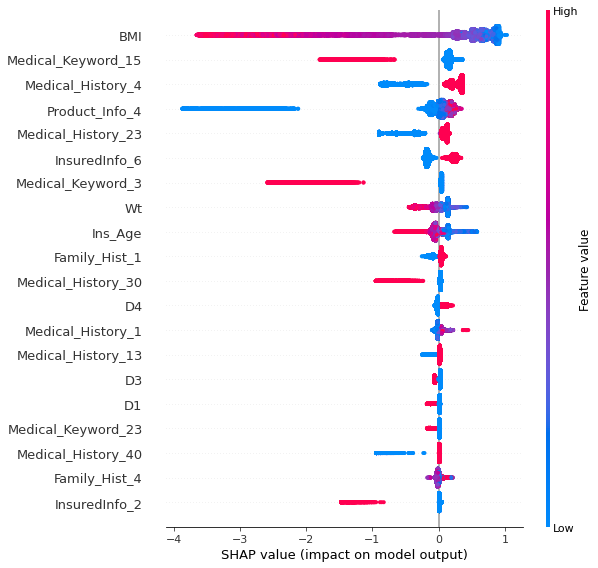

In [48]:
#Feature importance on XGBoost Classifier
explainer_train_xgb = shap.TreeExplainer(xg)
shap_values_train_xgb = explainer_train_xgb(xtrain)
shap.summary_plot(shap_values_train_xgb, plot_type = 'dot')

In [ ]:
#Feature importance on XGBoost Classifier
explainer_train_rf = shap.TreeExplainer(rf)
shap_values_train_rf = explainer_train_rf(xtrain)
shap.summary_plot(shap_values_train_rf, plot_type = 'dot')